In [281]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, OneHotEncoder
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

Loading the dataset

In [282]:
train_data = pd.read_csv('https://raw.githubusercontent.com/kakashi3lite/DataScienceEngineeringINFO6105/main/train_u6lujuX_CVtuZ9i.csv')
test_data = pd.read_csv('https://raw.githubusercontent.com/kakashi3lite/DataScienceEngineeringINFO6105/main/test_Y3wMUE5_7gLdaTN.csv')

In [283]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [284]:
from sklearn.preprocessing import StandardScaler

In [285]:
train_data.dropna(inplace=True)

In [286]:
X=train_data.drop('Loan_Status',axis=1)
y= train_data['Loan_Status']

In [287]:
from sklearn.preprocessing import LabelEncoder

In [288]:
le=LabelEncoder()

In [289]:
train_data['Married']=le.fit_transform(train_data['Married'])
train_data['Education']=le.fit_transform(train_data['Education'])
train_data['Self_Employed']=le.fit_transform(train_data['Self_Employed'])
train_data['Property_Area']=le.fit_transform(train_data['Property_Area'])
train_data['Loan_Status']=le.fit_transform(train_data['Loan_Status'])
train_data['Dependents']=le.fit_transform(train_data['Dependents'])
train_data['Gender']=le.fit_transform(train_data['Gender'])

In [290]:
test_data['Married']=le.fit_transform(test_data['Married'])
test_data['Education']=le.fit_transform(test_data['Education'])
test_data['Self_Employed']=le.fit_transform(test_data['Self_Employed'])
test_data['Property_Area']=le.fit_transform(test_data['Property_Area'])
test_data['Dependents']=le.fit_transform(test_data['Dependents'])
test_data['Gender']=le.fit_transform(test_data['Gender'])

In [291]:
train_data.drop('Loan_ID',axis=1,inplace=True)

Installing Shap

In [292]:
pip install shap

In [293]:
import shap
from sklearn.model_selection import train_test_split
import statsmodels.api as sm


Linear Regression

In [294]:
X_train,X_test,y_train,y_test=train_test_split(train_data.drop('Loan_Status',axis=1),train_data['Loan_Status'], test_size=0.3,random_state=101)


In [295]:
model=sm.OLS(y_train,X_train).fit()

In [296]:
y_pred=model.predict(X_train)
y_pred_test=model.predict(X_test)
print(mean_absolute_error(y_train,y_pred))
print(mean_absolute_error(y_test,y_pred_test))

0.28212987725201505
0.32452449868786254


In [297]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            Loan_Status   R-squared (uncentered):                   0.795
Model:                            OLS   Adj. R-squared (uncentered):              0.788
Method:                 Least Squares   F-statistic:                              114.6
Date:                Mon, 18 Mar 2024   Prob (F-statistic):                   9.04e-105
Time:                        04:00:52   Log-Likelihood:                         -148.25
No. Observations:                 336   AIC:                                      318.5
Df Residuals:                     325   BIC:                                      360.5
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Gender                0.0327      0.058      0.567      0.571      -0.081       0.146
Married               0.1647      0.050      3.286      0.001       0.066       0.263
Dependents            0.0038      0.023      0.164      0.870      -0.041       0.049
Education         -6.668e-05      0.053     -0.001      0.999      -0.104       0.103
Self_Employed        -0.0539      0.061     -0.887      0.376      -0.174       0.066
ApplicantIncome    1.244e-06   4.06e-06      0.306      0.759   -6.74e-06    9.23e-06
CoapplicantIncome -8.286e-06   7.69e-06     -1.078      0.282   -2.34e-05    6.84e-06
LoanAmount           -0.0006      0.000     -1.764      0.079      -0.001    6.42e-05
Loan_Amount_Term      0.0002      0.000      1.224      0.222      -0.000       0.001
Credit_History        0.6848      0.055     12.457      0.000       0.577       0.793
Property_Area        -0.0126      0.026     -0.482      0.630      -0.064       0.039
==============================================================================
Omnibus:                       49.214   Durbin-Watson:                   2.188
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               66.711
Skew:                          -1.020   Prob(JB):                     3.26e-15
Kurtosis:                       3.776   Cond. No.                     2.55e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.55e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Applying RandomForestRegressor

In [298]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score



In [299]:
rfr=RandomForestRegressor()

In [300]:
rfr.fit(X_train,y_train)
y_pred=rfr.predict(X_train)
y_pred_test=rfr.predict(X_test)
print(mean_absolute_error(y_train,y_pred))
print(mean_absolute_error(y_test,y_pred_test))

0.10330357142857145
0.32430555555555557


<BarContainer object of 11 artists>

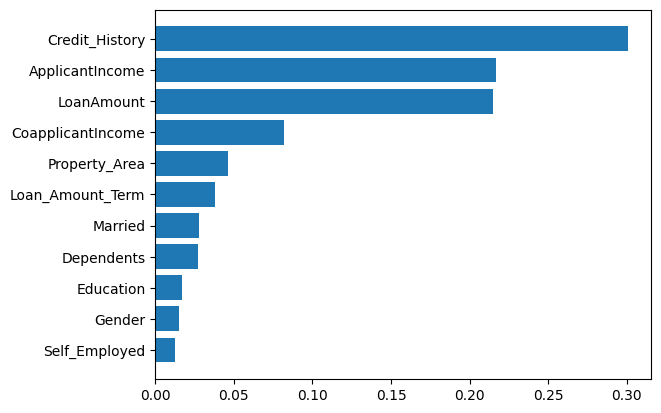

In [301]:
sorted_idx = rfr.feature_importances_.argsort()
result = sorted(zip(X_train.columns, rfr.feature_importances_), key = lambda x: x[1], reverse=False)
plt.barh([x[0] for x in result], [x[1] for x in result])

In [302]:
model=LogisticRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_train)
y_pred_test=model.predict(X_test)
print(f'Training Accuracy : {accuracy_score(y_train,y_pred)}\n')
print(f'Testing Accuracy : {accuracy_score(y_test,y_pred_test)}\n')
print(f'Training Confusion Matrix :\n {confusion_matrix(y_train,y_pred)}\n')
print(f'Testing Confusion Matrix :\n {confusion_matrix(y_test,y_pred_test)}\n')

Training Accuracy : 0.8154761904761905

Testing Accuracy : 0.7638888888888888

Training Confusion Matrix :
 [[ 51  53]
 [  9 223]]

Testing Confusion Matrix :
 [[14 30]
 [ 4 96]]



<Axes: ylabel='Feature'>

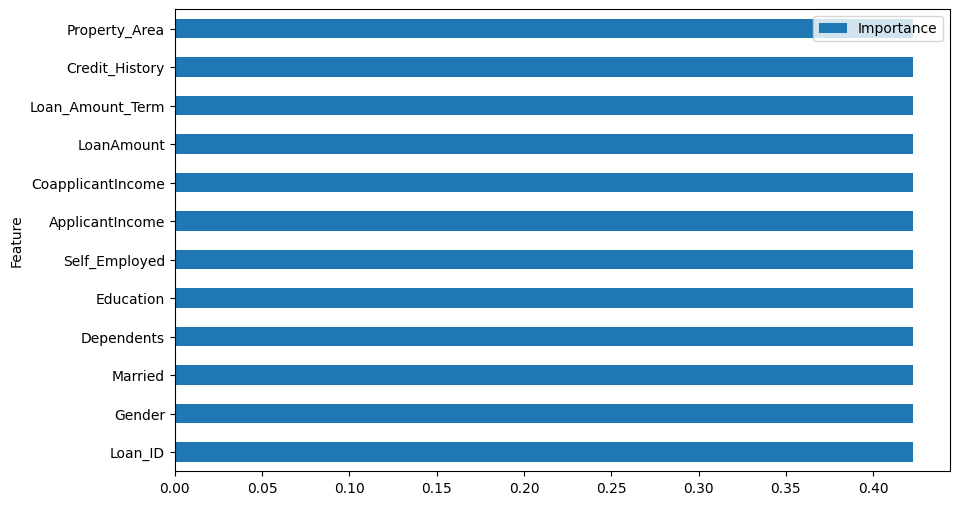

In [314]:
coefficients = model.coef_[0]
avg_importance = np.mean(np.abs(coefficients), axis=0)
feature_importance = pd.DataFrame({'Feature': X.columns,'Importance': avg_importance})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))

In [313]:
X.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [315]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [316]:
import seaborn as sns

In [ ]:
explainer = shap.Explainer(rfr.predict, X_train)
shap_values = explainer(X_test)

In [320]:
shap.initjs()

In [321]:
def sample_feature_importance(idx, type='condensed'):
    if type == 'condensed':
        return shap.plots.force(shap_values[idx])
    elif type == 'waterfall':
        return shap.plots.waterfall(shap_values[idx])
    else:
        return "Return valid visual ('condensed', 'waterfall')"

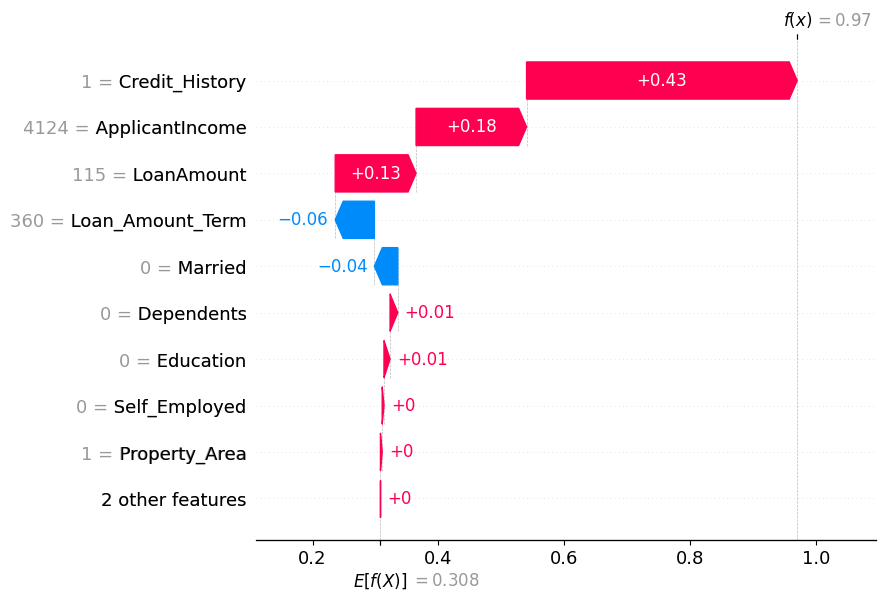

In [322]:
sample_feature_importance(0, 'waterfall')

In [323]:
pip install h2o

In [324]:
import h2o
from h2o.automl import H2OAutoML

In [325]:
h2o.init()
h2odata=h2o.H2OFrame(train_data)

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,1 hour 48 mins
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.1
H2O_cluster_version_age:,4 days
H2O_cluster_name:,H2O_from_python_unknownUser_z1rfho
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.163 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [326]:
h2odata.head()

Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,0,0,4583,1508,128,360,1,0,0
1,1,0,0,1,3000,0,66,360,1,2,1
1,1,0,1,0,2583,2358,120,360,1,2,1
1,0,0,0,0,6000,0,141,360,1,2,1
1,1,2,0,1,5417,4196,267,360,1,2,1
1,1,0,1,0,2333,1516,95,360,1,2,1
1,1,3,0,0,3036,2504,158,360,0,1,0
1,1,2,0,0,4006,1526,168,360,1,2,1
1,1,1,0,0,12841,10968,349,360,1,1,0
1,1,2,0,0,3200,700,70,360,1,2,1


In [327]:
train,test=h2odata.split_frame(destination_frames=['train.hex','test.hex'])

In [328]:
aml=H2OAutoML(max_models=10,seed=1,sort_metric='MAE')
aml.train(x=list(set(list(train.columns))-set('Loan_Status')),y='Loan_Status',training_frame=train)

AutoML progress: |
04:11:26.304: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.

█
04:11:29.264: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.
04:11:29.633: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.


04:11:30.112: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.

██████
04:11:36.860: _response param, We have d

Model Details
=============
H2ORandomForestEstimator : Distributed Random Forest
Model Key: DRF_1_AutoML_3_20240318_41126


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    32                 32                          30305                  11           20           15.375        56            88            70.5625

ModelMetricsRegression: drf
** Reported on train data. **

MSE: 0.16799899845785546
RMSE: 0.40987680888024813
MAE: 0.2918934393755528
RMSLE: 0.28355364319181625
Mean Residual Deviance: 0.16799899845785546

ModelMetricsRegression: drf
** Reported on cross-validation data. **

MSE: 0.16490377704375775
RMSE: 0.4060834606872801
MAE: 0.3058337950428108
RMSLE: 0.2817364010210483
Mean Residual Deviance: 0.16490377704375775

Cross-Validation Metrics Summary: 
                        mean      sd         cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  --------  ---------  ------------  ------------  ------------  ------------  ------------
aic                     nan       0          nan           nan           nan           nan           nan
loglikelihood           nan       0          nan           nan           nan           nan           nan
mae                     0.307441  0.0200774  0.297136      0.28737       0.324716      0.332953      0.295029
mean_residual_deviance  0.165573  0.0172767  0.167676      0.171513      0.160163      0.187937      0.140577
mse                     0.165573  0.0172767  0.167676      0.171513      0.160163      0.187937      0.140577
r2                      0.224072  0.107064   0.268785      0.264097      0.194806      0.0551728     0.337499
residual_deviance       0.165573  0.0172767  0.167676      0.171513      0.160163      0.187937      0.140577
rmse                    0.406456  0.0214076  0.409482      0.414141      0.400203      0.433517      0.374936
rmsle                   0.282599  0.0143865  0.288515      0.291445      0.272151      0.297708      0.263178

Scoring History: 
    timestamp            duration    number_of_trees    training_rmse    training_mae    training_deviance
--  -------------------  ----------  -----------------  ---------------  --------------  -------------------
    2024-03-18 04:11:38  1.639 sec   0                  nan              nan             nan
    2024-03-18 04:11:38  1.681 sec   5                  0.486964         0.287085        0.237134
    2024-03-18 04:11:38  1.719 sec   10                 0.443974         0.285106        0.197113
    2024-03-18 04:11:38  1.740 sec   15                 0.428801         0.297243        0.183871
    2024-03-18 04:11:38  1.767 sec   20                 0.419463         0.293423        0.17595
    2024-03-18 04:11:38  1.791 sec   25                 0.411946         0.292017        0.1697
    2024-03-18 04:11:38  1.814 sec   30                 0.40958          0.291522        0.167756
    2024-03-18 04:11:38  1.821 sec   32                 0.409877         0.291893        0.167999

Variable Importances: 
variable           relative_importance    scaled_importance    percentage
-----------------  ---------------------  -------------------  ------------
Credit_History     562.43                 1                    0.334905
ApplicantIncome    280.405                0.498559             0.16697
LoanAmount         261.373                0.464721             0.155637
CoapplicantIncome  187.095                0.332655             0.111408
Dependents         89.7736                0.159617             0.0534566
Property_Area      89.331                 0.15883              0.0531931
Loan_Amount_Term   66.4711                0.118185             0.0395809
Married            42.2265                0.07

In [329]:
leader=aml.leaderboard
print(leader)

model_id                                                     mae      rmse       mse     rmsle    mean_residual_deviance
DRF_1_AutoML_3_20240318_41126                           0.305834  0.406083  0.164904  0.281736                  0.164904
GBM_2_AutoML_3_20240318_41126                           0.309341  0.398749  0.159001  0.277537                  0.159001
GBM_3_AutoML_3_20240318_41126                           0.316155  0.401422  0.16114   0.27886                   0.16114
GBM_4_AutoML_3_20240318_41126                           0.318019  0.403901  0.163136  0.280725                  0.163136
GLM_1_AutoML_3_20240318_41126                           0.318081  0.399672  0.159738  0.278391                  0.159738
StackedEnsemble_BestOfFamily_1_AutoML_3_20240318_41126  0.320325  0.398734  0.158989  0.278004                  0.158989
StackedEnsemble_AllModels_1_AutoML_3_20240318_41126     0.320906  0.398603  0.158884  0.278056                  0.158884
XGBoost_3_AutoML_3_20240318_41126

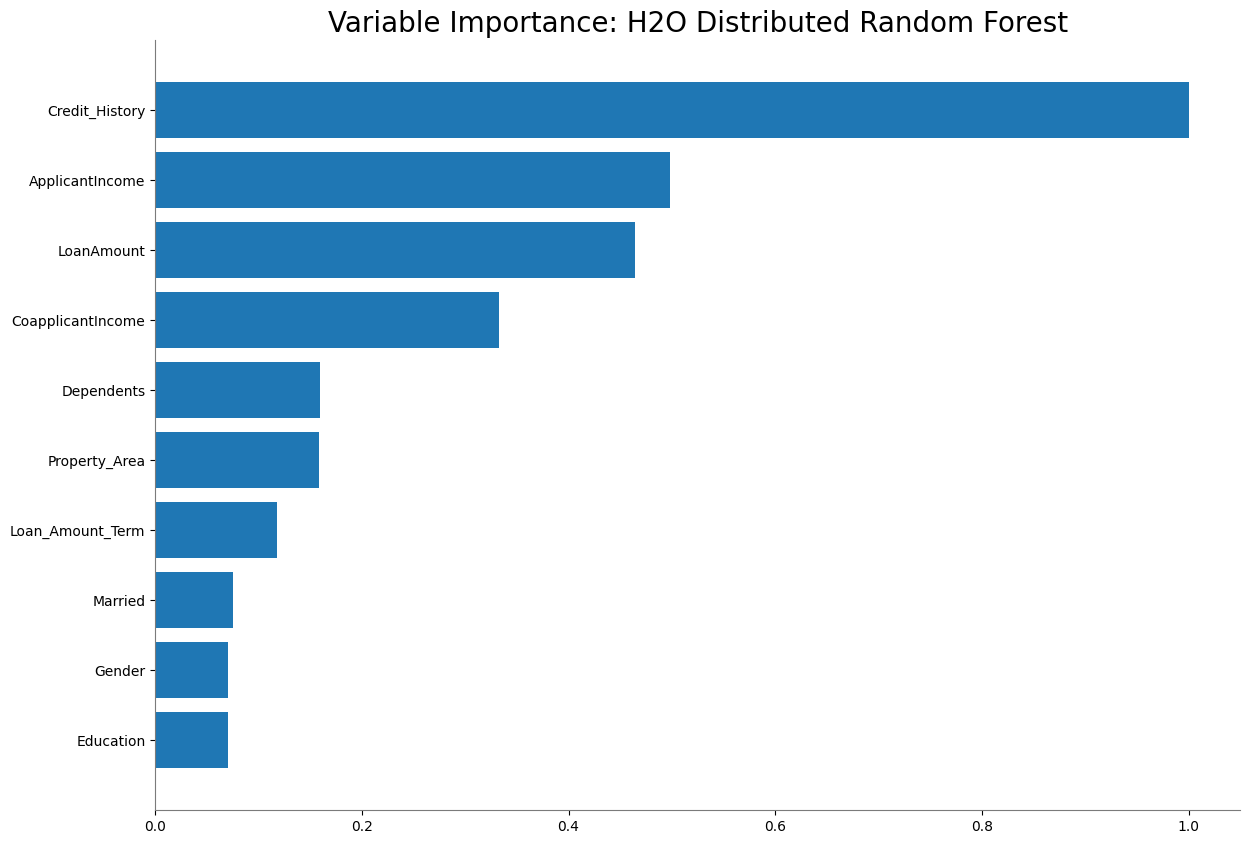

<Figure size 640x480 with 0 Axes>

In [330]:
bestmodel=aml.leader
bestmodel.model_performance(test)
bestmodel.varimp_plot()

References:


1.W3School
2.h2o.ai
3.scikit-learn.org/stable/modules/
4.towardsdatascience.com/generalized-linear-models-9cbf848bb8ab

MIT License

Copyright (c) 2024 Swanand Tanavade

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.